### ## BBM 409 - Programming Assignment 2

* You can add as many cells as you want in-between each question.
* Please add comments to your code to explain your work.  

* Please be careful about the order of runs of cells. Doing the homework, it is likely that you will be running the cells in different orders, however, they will be evaluated in the order they appear. Hence, please try running the cells in this order before submission to make sure they work.    
* Please refer to the homework text for any implementation detail. You should also carefully review the steps explained here.
* This document is also your report. Show your work.

## Name : Ezgi Ekin
## Student ID : 2210356029

# 1. LOGISTIC REGRESSION TASK (40 points)

### 1. Data Loading and Exploration

##### Download the Bank Marketing dataset from https://drive.google.com/file/d/1t6QAtqfYLMhvv_XUnG4D_UsJcSwgF4an/view?usp=sharing  import other necessary libraries

In [287]:
import pandas as pd
import numpy as np
df=pd.read_csv("portuguese_bank_marketing_numeric_random_subsampled.csv", encoding="utf-8")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,28,9.0,0,2.0,1,1055,1,1,1.0,28,1,196,1,-1,0,0.0,1
1,36,4.0,1,2.0,1,520,2,1,0.0,23,5,110,2,-1,0,0.0,1
2,38,2.0,0,3.0,1,1314,2,2,1.0,16,7,378,2,-1,0,0.0,1
3,41,9.0,1,3.0,1,28,2,1,1.0,4,2,358,2,-1,0,0.0,1
4,27,2.0,0,3.0,1,290,1,1,1.0,10,8,88,1,-1,0,0.0,1


In [289]:
print("\nSummary statistics:")
df.describe()


Summary statistics:


,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
count,10578.000000,10578.000000,10578.000000,10578.000000,10578.000000,10578.000000,10578.000000,10578.000000,10578.000000,10578.000000,10578.000000,10578.000000,10578.000000,10578.000000,10578.000000,10578.000000,10578.000000
mean,41.189355,4.188788,0.795330,2.104935,1.013991,1528.343354,1.472396,1.131688,0.862072,15.516638,6.188410,380.883059,2.493855,51.955663,0.860560,0.504160,1.500000
std,12.007143,2.825885,0.627736,0.791340,0.117460,3124.718140,0.499261,0.338168,0.508764,8.412610,2.565498,353.020396,2.649877,108.890295,3.534368,0.971481,0.500024
min,18.000000,0.000000,0.000000,0.000000,1.000000,-3058.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,1.000000
25%,32.000000,2.000000,0.000000,2.000000,1.000000,123.000000,1.000000,1.000000,1.000000,8.000000,5.000000,144.000000,1.000000,-1.000000,0.000000,0.000000,1.000000
50%,39.000000,4.000000,1.000000,2.000000,1.000000,554.000000,1.000000,1.000000,1.000000,15.000000,6.000000,259.000000,2.000000,-1.000000,0.000000,0.000000,1.500000
75%,49.000000,6.000000,1.000000,3.000000,1.000000,1707.750000,2.000000,1.000000,1.000000,21.000000,8.000000,515.000000,3.000000,43.750000,1.000000,1.000000,2.000000
max,95.000000,11.000000,2.000000,3.000000,2.000000,81204.000000,2.000000,2.000000,2.000000,31.000000,12.000000,4918.000000,63.000000,854.000000,275.000000,3.000000,2.000000


In [291]:
missing_values = df.isnull().sum()
print(missing_values)

age            0
job            0
marital        0
education      0
default        0
balance        0
housing        0
loan           0
contact        0
day_of_week    0
month          0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64


In [293]:
df.duplicated(keep=False)



0        False
1        False
2        False
3        False
4        False
         ...  
10573    False
10574    False
10575    False
10576    False
10577    False
Length: 10578, dtype: bool

In [295]:
df.dtypes

age              int64
job            float64
marital          int64
education      float64
default          int64
balance          int64
housing          int64
loan             int64
contact        float64
day_of_week      int64
month            int64
duration         int64
campaign         int64
pdays            int64
previous         int64
poutcome       float64
y                int64
dtype: object

In [297]:
whole_array = df.to_numpy()

df['y'] = df['y'].map({1: 0, 2: 1})

filtered_column_names = [col for col in df.columns if col not in 'y']

features_array = df[filtered_column_names].to_numpy()

target_array = df['y'].to_numpy()

print(whole_array)
print(features_array)
print(target_array)

[[28.  9.  0. ...  0.  0.  1.]
 [36.  4.  1. ...  0.  0.  1.]
 [38.  2.  0. ...  0.  0.  1.]
 ...
 [51.  2.  1. ...  0.  0.  2.]
 [71.  5.  2. ...  0.  0.  2.]
 [72.  5.  1. ...  3.  3.  2.]]
[[ 28.   9.   0. ...  -1.   0.   0.]
 [ 36.   4.   1. ...  -1.   0.   0.]
 [ 38.   2.   0. ...  -1.   0.   0.]
 ...
 [ 51.   2.   1. ...  -1.   0.   0.]
 [ 71.   5.   2. ...  -1.   0.   0.]
 [ 72.   5.   1. ... 184.   3.   3.]]
[0 0 0 ... 1 1 1]


### 2. calculate correlation between target variable 'y' and other features (5 points)

In [301]:
correlation_with_target = df.corr()['y'].drop('y')  # Drop 'y' itself for clarity

In [303]:
# Sort and display the correlation values
sorted_correlation = correlation_with_target.abs().sort_values(ascending=False)
print(sorted_correlation)

duration       0.443087
poutcome       0.291850
contact        0.219086
housing        0.213409
pdays          0.153807
campaign       0.133147
loan           0.118816
balance        0.088308
previous       0.087656
education      0.082672
marital        0.062501
day_of_week    0.042603
age            0.040038
default        0.035414
month          0.031213
job            0.022716
Name: y, dtype: float64


# 1.1 Implementing Logistic Regression with most correlated 2 features

###  Choose the two most correlated features with target feature 'y' 

In [307]:
X=df[['duration', 'poutcome']]
y=df['y']

In [309]:
print(X)
print(y)

       duration  poutcome
0           196       0.0
1           110       0.0
2           378       0.0
3           358       0.0
4            88       0.0
...         ...       ...
10573       300       1.0
10574       386       0.0
10575       977       0.0
10576       456       0.0
10577      1127       3.0

[10578 rows x 2 columns]
0        0
1        0
2        0
3        0
4        0
        ..
10573    1
10574    1
10575    1
10576    1
10577    1
Name: y, Length: 10578, dtype: int64


###  * Define your logistic regression model as class without using any built-in libraries
### * Define necessary functions such as sigmoid, fit, predict  (10 points)

In [312]:
import numpy as np

class LogisticRegression:
    def __init__(self, learning_rate, epoch, weight, bias):
        """
        Initialize the Logistic Regression model with learning rate, number of epochs, weights, and bias.

        Parameters:
        learning_rate: float - Learning rate for gradient descent.
        epoch: int - Number of iterations for training.
        weight: numpy array - Initial weight vector.
        bias: float - Initial bias term.
        """
        self.weight = weight  # Weight vector
        self.bias = bias  # Bias term
        self.learning_rate = learning_rate  # Learning rate for gradient descent
        self.epoch = epoch  # Number of epochs (iterations)

    def sigmoid(self, z):
        """
        Apply the sigmoid activation function to the input.

        Parameters:
        z: numpy array - Linear model output (z = WX + b).

        Returns:
        numpy array - Sigmoid-transformed probabilities.
        """
        z = np.clip(z, -500, 500)  # Prevent overflow by limiting the range of z
        return 1 / (1 + np.exp(-z))  # Sigmoid function

    def fit(self, X, y):
        """
        Train the Logistic Regression model using gradient descent.

        Parameters:
        X: numpy array - Training feature matrix (n_samples x n_features).
        y: numpy array - Target labels (n_samples,).

        Returns:
        tuple - Updated weights and bias after training.
        """
        rows = X.shape[0]  # Number of training samples

        for i in range(self.epoch):  # Iterate over the number of epochs
            pred_y = self.predict_probability(X)  # Predicted probabilities
            error = pred_y - y  # Difference between predicted and actual values

            # Compute gradients for weights and bias
            cost_weight = np.dot(X.T, error) / rows  # Gradient for weights
            cost_bias = np.sum(error) / rows  # Gradient for bias

            # Update parameters using the gradients and learning rate
            self.weight -= self.learning_rate * cost_weight
            self.bias -= self.learning_rate * cost_bias

        return self.weight, self.bias  # Return updated parameters

    def predict_probability(self, X):
        """
        Predict probabilities for the given input data.

        Parameters:
        X: numpy array - Feature matrix (n_samples x n_features).

        Returns:
        numpy array - Predicted probabilities.
        """
        linear_model = np.dot(X, self.weight) + self.bias  # Compute the linear model z = WX + b
        return self.sigmoid(linear_model)  # Apply sigmoid activation function

    def predict(self, X):
        """
        Predict binary class labels for the given input data.

        Parameters:
        X: numpy array - Feature matrix (n_samples x n_features).

        Returns:
        numpy array - Predicted class labels (0 or 1).
        """
        probabilities = self.predict_probability(X)  # Compute probabilities
        return (probabilities >= 0.5).astype(int)  # Threshold probabilities at 0.5 for classification


Split the dataset into a training set and a validation set (80% training and 20% validation).

In [316]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y.to_numpy(), test_size=0.2, random_state=42)

# Print the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", y_train.shape)
print("Shape of Y_test:", y_test.shape)

Shape of X_train: (8462, 2)
Shape of X_test: (2116, 2)
Shape of Y_train: (8462,)
Shape of Y_test: (2116,)


Scale the features using StandardScaler

In [319]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


* Initialize and train the custom logistic regression model

In [322]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import numpy as np

# Define parameter grid
learning_rates = [0.001, 0.003, 0.01, 0.03, 0.1]
epochs = [100, 200, 300, 500, 1000]

# Prepare cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize variables to track best parameters and performance
best_params = None
best_score = 0

# Iterate over parameter grid
for lr in learning_rates:
    for ep in epochs:
        scores = []  # To store accuracy for each fold
        
        # Perform k-fold cross-validation
        for train_index, val_index in kfold.split(X_train_scaled):
            X_train_fold, X_val_fold = X_train_scaled[train_index], X_train_scaled[val_index]
            y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
            
            # Initialize and train logistic regression model
            init_weight = np.zeros((X_train_scaled.shape[1],))
            init_bias = 0
            logistic = LogisticRegression(learning_rate=lr, epoch=ep, weight=init_weight, bias=init_bias)
            
            # Train the model
            logistic.fit(X_train_fold, y_train_fold)
            
            # Predict on validation data
            y_val_pred = logistic.predict(X_val_fold)
            
            # Calculate accuracy
            score = accuracy_score(y_val_fold, y_val_pred)
            scores.append(score)
        
        # Calculate average score across folds
        avg_score = np.mean(scores)
        
        # Update best parameters if current combination is better
        if avg_score > best_score:
            best_score = avg_score
            best_params = {'learning_rate': lr, 'epoch': ep}

# Output best parameters and performance
print("Best Parameters:", best_params)
print("Best Cross-Validation Score:", best_score)


Best Parameters: {'learning_rate': 0.1, 'epoch': 1000}
Best Cross-Validation Score: 0.7656585523201501


In [324]:
init_weight = np.zeros((X_train_scaled.shape[1],))  # Initialize weights as zeros with shape matching features
init_bias = 0  # Initialize bias to zero
epoch = best_params['epoch']
learning_rate = best_params['learning_rate']

logistic = LogisticRegression(learning_rate,epoch,init_weight,init_bias)

weight, bias = logistic.fit(X_train_scaled ,y_train)
prediction_train = logistic.predict(X_train_scaled)

print('Train Weight:', weight)
print('Train Bias:', bias)

Train Weight: [1.68696921 0.8530238 ]
Train Bias: 0.2454043253133805


* Make predictions on the validation set

In [327]:

prediction_test = logistic.predict(X_test_scaled)
print(prediction_test)
print(y_test)


[1 1 1 ... 0 1 0]
[1 1 1 ... 0 1 0]


### Evaluate the model's performance, print classification report and confusion matrix  (5 points)

In [331]:
from sklearn.metrics import classification_report, confusion_matrix
conf_matrix = confusion_matrix(y_test, prediction_test) 
print(conf_matrix)
print('-------------------------------------')
class_report = classification_report(y_test, prediction_test)
print(class_report)


[[883 209]
 [296 728]]
-------------------------------------
              precision    recall  f1-score   support

           0       0.75      0.81      0.78      1092
           1       0.78      0.71      0.74      1024

    accuracy                           0.76      2116
   macro avg       0.76      0.76      0.76      2116
weighted avg       0.76      0.76      0.76      2116



### Print decision boundaries as in PA1 (5 points)

In [334]:
import matplotlib.pyplot as plt
def plot_decision_boundary(X, y, model):
    """
    Plot the decision boundary for logistic regression.
    
    :param X: Feature matrix (2D, shape [n_samples, 2])
    :param y: Target labels (binary, shape [n_samples])
    :param model: Trained logistic regression model with weights and bias
    """
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    # Predict probabilities for the grid
    Z = model.predict_probability(np.c_[xx.ravel(), yy.ravel()])  # No [:, 1]
    Z = Z.reshape(xx.shape)

    # Plot decision boundary
    plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], alpha=0.8, cmap='coolwarm')
    plt.colorbar(label="Probability")

    # Scatter plot of the data points
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='coolwarm')
    plt.xlabel("Duration")
    plt.ylabel("Poutcome")
    plt.title("Logistic Regression Decision Boundary")
    plt.show()

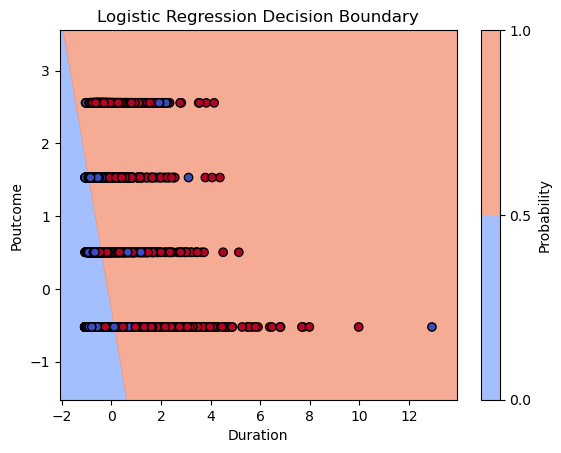

In [336]:
plot_decision_boundary(X_train_scaled,y_train,logistic)

# 1.2 Implementing Logistic Regression using all features. 

* Redefine input and target variables. In this experiment, you will use all input features in the dataset.

* Split the dataset into a training set and a validation set (80% training and 20% validation).

In [342]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features_array, target_array, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", y_train.shape)
print("Shape of Y_test:", y_test.shape)

Shape of X_train: (8462, 16)
Shape of X_test: (2116, 16)
Shape of Y_train: (8462,)
Shape of Y_test: (2116,)


* Scale the features using StandardScaler

In [345]:
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Initialize and train the custom logistic regression model.

In [348]:
init_weight = np.zeros((X_train_scaled.shape[1],))  # Initialize weights as zeros with shape matching features
init_bias = 0  # Initialize bias to zero
epoch = best_params['epoch']
learning_rate = best_params['learning_rate']

logistic = LogisticRegression(learning_rate,epoch,init_weight,init_bias)

weight, bias = logistic.fit(X_train_scaled ,y_train)
prediction_train = logistic.predict(X_train_scaled)

print('Train Weight:', weight)
print('Train Bias:', bias)

Train Weight: [ 0.01023941  0.05273019 -0.12707437  0.19696283 -0.03714417  0.13264754
 -0.49133573 -0.250419    0.4539763  -0.06916563 -0.07563932  1.8954868
 -0.35629455 -0.11074037 -0.04789552  0.86012807]
Train Bias: 0.20285774398124773


* Make predictions on the validation set

In [351]:

prediction_test = logistic.predict(X_test_scaled)
print(prediction_test)
print(y_test)


[1 1 1 ... 0 1 0]
[1 1 1 ... 0 1 0]


### Evaluate the model's performance, print classification report and confusion matrix  (5 points)

In [354]:
from sklearn.metrics import classification_report, confusion_matrix
conf_matrix = confusion_matrix(y_test, prediction_test) 
print(conf_matrix)
print('-------------------------------------')
class_report = classification_report(y_test, prediction_test)
print(class_report)

[[882 210]
 [223 801]]
-------------------------------------
              precision    recall  f1-score   support

           0       0.80      0.81      0.80      1092
           1       0.79      0.78      0.79      1024

    accuracy                           0.80      2116
   macro avg       0.80      0.79      0.80      2116
weighted avg       0.80      0.80      0.80      2116



In [356]:
class_report_dict = classification_report(y_test, prediction_test, output_dict=True)
logistic_results = {
    "Model": "Logistic Regression",
    "Precision (0)":class_report_dict['0']['precision'],
    "Recall (0)": class_report_dict['0']['recall'] ,
    "F1-Score (0)":class_report_dict['0']['f1-score'] ,
    "Precision (1)": class_report_dict['1']['precision'],
    "Recall (1)": class_report_dict['1']['recall'] ,
    "F1-Score (1)": class_report_dict['1']['f1-score'] ,
    "Accuracy":class_report_dict['accuracy'] ,
}


### Print decision boundaries as in PA1. Briefly explain the impact of the number of features on the learning ability of the model. (5 points)

Using all features adds more dimensions to the model's space. This gives the model more information, but it also makes the decision boundary more complex. While this can help balance precision and recall, it doesn't always improve accuracy by much.

Using only the two most correlated features keeps the decision boundary simpler. This simplicity can improve performance, especially if the other features add noise or are less useful. The two most correlated features are likely the strongest predictors of the target variable, so the model relies more on these key features.

The difference in False Positives and False Negatives shows that using all features helps the model handle class 1 better. On the other hand, the two-feature model focuses more on classifying class 0, because it is influenced more by the strongest predictors.

Using fewer features also reduces the risk of overfitting, which can help the model generalize better to new data.

### After completing the SVM and logistic regression tasks, the best results of the experiments with the SVM and Logistic regression models will be compared in a table. (5 points)

In [402]:
results_df = pd.DataFrame([logistic_results, svm_results])

# Assuming results_df is already defined
# Combine metrics for class 0 in Logistic Regression and class -1 in SVM
results_df["Precision (0/-1)"] = results_df["Precision (0)"].fillna(results_df["Precision (-1)"])
results_df["Recall (0/-1)"] = results_df["Recall (0)"].fillna(results_df["Recall (-1)"])
results_df["F1-Score (0/-1)"] = results_df["F1-Score (0)"].fillna(results_df["F1-Score (-1)"])

# Drop the old redundant columns for 0 and -1
results_df = results_df.drop(columns=["Precision (0)", "Recall (0)", "F1-Score (0)", "Precision (-1)", "Recall (-1)", "F1-Score (-1)"])

results_df

,Model,Precision (1),Recall (1),F1-Score (1),Accuracy,Precision (0/-1),Recall (0/-1),F1-Score (0/-1)
0,Logistic Regression,0.792285,0.782227,0.787224,0.795369,0.79819,0.807692,0.802913
1,SVM,0.795620,0.851562,0.822642,0.822306,0.85098,0.794872,0.821970



Logistic Regression reaches 79% accuracy, but SVM improves this to 82%, showing an improvement in performance. Additionally, SVM delivers higher precision, recall, and F1-scores. For instance, the precision for class 0 increases from 0.79 to 0.85, and the recall for class 1 improves from 0.78 to 0.85. This demonstrates that SVM is better at understanding class distributions and handling complex data patterns.

The key reason SVM performs better is the use of its RBF kernel, which allows it to handle non-linear relationships in the data. Logistic Regression relies on a straight-line decision boundary, which makes it less effective when the data is not linearly separable. In contrast, the RBF kernel transforms the data into a higher-dimensional space, enabling SVM to create curved decision boundaries that can separate the data more effectively.

SVM’s ability to use the RBF kernel gives it a clear edge when working with datasets that have non-linear patterns or overlapping classes. This makes SVM more accurate and reliable than Logistic Regression, which is limited by its linear decision-making approach.

# 2. Support Vector Machine Task  (30 points)

* Define your SVM model using sklearn

In [361]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

## 2.1 implementing svm with grid search cv using all features (10 points)

* Define features and target variable, you will use all features of dataset in this task

In [365]:
target_array = np.where(target_array == 0, -1, 1)
print(target_array)

[-1 -1 -1 ...  1  1  1]


* Split the dataset into a training set and a validation set (80% training and 20% validation).

In [368]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features_array, target_array, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", y_train.shape)
print("Shape of Y_test:", y_test.shape)

Shape of X_train: (8462, 16)
Shape of X_test: (2116, 16)
Shape of Y_train: (8462,)
Shape of Y_test: (2116,)


* Scale the features using StandardScaler

In [371]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Implement GridSearchCV  (5 points) 

In [374]:
param_grid = {
    'C': [0.1, 1, 10],         # Regularization parameter
    'kernel': ['linear', 'rbf','poly'], # Linear and RBF and polynomial kernels
    'gamma': ['scale', 'auto']  # Kernel coefficient for RBF
}

grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', verbose=2)
grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.5s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.6s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.5s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.5s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.5s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.8s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.8s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.8s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.8s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.8s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.7s
[CV] END ....................C=0.1, gamma=scale,

* Initialize the SVM classifier

In [377]:
svm_classifier = SVC(C=best_params['C'], gamma=best_params['gamma'], kernel=best_params['kernel'])

* Train the SVM classifier with the best parameters found from grid search


In [380]:
svm_classifier.fit(X_train_scaled, y_train)

SVC(C=10, gamma='auto')

* Make predictions on the validation set using the best model


In [383]:
y_pred = svm_classifier.predict(X_test_scaled)

#### Evaluate the model's performance, print classification report and confusion matrix and best parameters found from GridSearchCV  (5 points)

In [386]:
accuracy = svm_classifier.score(X_test_scaled, y_test)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print(f"Best Parameters from Grid Search: {best_params}")
print(f"Validation Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Best Parameters from Grid Search: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Validation Accuracy: 0.8223062381852552
Confusion Matrix:
[[868 224]
 [152 872]]
Classification Report:
              precision    recall  f1-score   support

          -1       0.85      0.79      0.82      1092
           1       0.80      0.85      0.82      1024

    accuracy                           0.82      2116
   macro avg       0.82      0.82      0.82      2116
weighted avg       0.82      0.82      0.82      2116



In [396]:
class_report_dict_svm = classification_report(y_test, y_pred, output_dict=True)
svm_results = {
    "Model": "SVM",
    "Precision (-1)":class_report_dict_svm['-1']['precision'],
    "Recall (-1)": class_report_dict_svm['-1']['recall'] ,
    "F1-Score (-1)":class_report_dict_svm['-1']['f1-score'] ,
    "Precision (1)": class_report_dict_svm['1']['precision'],
    "Recall (1)": class_report_dict_svm['1']['recall'] ,
    "F1-Score (1)": class_report_dict_svm['1']['f1-score'] ,
    "Accuracy": class_report_dict_svm['accuracy'] ,
}

## 2.2 implementing svm with most correlated 2 features (10 points)

#### Choose the two most correlated features with target feature 'y' 

In [405]:
# Sort and display the correlation values
sorted_correlation = correlation_with_target.abs().sort_values(ascending=False)
print(sorted_correlation)
X=df[['duration', 'poutcome']]
y=df['y']

duration       0.443087
poutcome       0.291850
contact        0.219086
housing        0.213409
pdays          0.153807
campaign       0.133147
loan           0.118816
balance        0.088308
previous       0.087656
education      0.082672
marital        0.062501
day_of_week    0.042603
age            0.040038
default        0.035414
month          0.031213
job            0.022716
Name: y, dtype: float64


* Split the dataset into a training set and a validation set (80% training and 20% validation).

In [408]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(),y.to_numpy(), test_size=0.2, random_state=42)

# Print the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", y_train.shape)
print("Shape of Y_test:", y_test.shape)

Shape of X_train: (8462, 2)
Shape of X_test: (2116, 2)
Shape of Y_train: (8462,)
Shape of Y_test: (2116,)


* Scale the features using StandardScaler

In [411]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

*  Initialize the SVM classifier, assign 'C' and 'kernel' parameters from the best hyperparameters you found from GridSearchCV 

In [414]:
svm_classifier_2D = SVC(C=best_params['C'], gamma=best_params['gamma'], kernel=best_params['kernel'])

* Train the SVM classifier

In [417]:
svm_classifier_2D.fit(X_train_scaled, y_train)

SVC(C=10, gamma='auto')

* Make predictions on the validation set

In [420]:
y_pred = svm_classifier_2D.predict(X_test_scaled)

#### Evaluate the model's performance, print classification report and confusion matrix  (5 points)

In [423]:
accuracy = svm_classifier_2D.score(X_test_scaled, y_test)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print(f"Best Parameters from Grid Search: {best_params}")
print(f"Validation Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Best Parameters from Grid Search: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Validation Accuracy: 0.7693761814744802
Confusion Matrix:
[[883 209]
 [279 745]]
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.81      0.78      1092
           1       0.78      0.73      0.75      1024

    accuracy                           0.77      2116
   macro avg       0.77      0.77      0.77      2116
weighted avg       0.77      0.77      0.77      2116



##### Visualize decision boundary and support vectors (5 points)

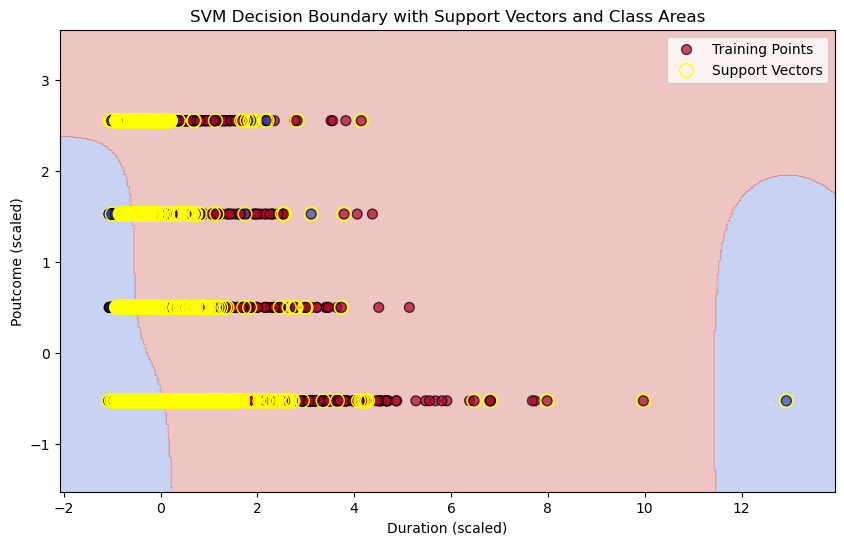

In [426]:
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.pyplot as plt

# Create a grid to plot the decision boundary
xx, yy = np.meshgrid(
    np.linspace(X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1, 500),
    np.linspace(X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1, 500)
)
grid = np.c_[xx.ravel(), yy.ravel()]
Z = svm_classifier_2D.predict(grid)
Z = Z.reshape(xx.shape)

# Plotting
plt.figure(figsize=(10, 6))

# Plot decision regions
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')

# Scatter plot of training points
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap='coolwarm', s=50, edgecolor='k', alpha=0.7, label='Training Points')

# Highlight support vectors
plt.scatter(svm_classifier_2D.support_vectors_[:, 0], svm_classifier_2D.support_vectors_[:, 1], facecolors='none', edgecolors='yellow', s=100, label='Support Vectors')

plt.title('SVM Decision Boundary with Support Vectors and Class Areas')
plt.xlabel('Duration (scaled)')
plt.ylabel('Poutcome (scaled)')
plt.legend()
plt.show()

## 2.3 implementing svm with least correlated 2 features (10 points) 

#### Choose the two least correlated features with target feature 'y' 

In [431]:
sorted_correlation = correlation_with_target.abs().sort_values(ascending=False)
print(sorted_correlation)
X=df[['job', 'month']]
y=df['y']

duration       0.443087
poutcome       0.291850
contact        0.219086
housing        0.213409
pdays          0.153807
campaign       0.133147
loan           0.118816
balance        0.088308
previous       0.087656
education      0.082672
marital        0.062501
day_of_week    0.042603
age            0.040038
default        0.035414
month          0.031213
job            0.022716
Name: y, dtype: float64


* Split the dataset into a training set and a validation set (80% training and 20% validation).

In [434]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(),y.to_numpy(), test_size=0.2, random_state=42)

# Print the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", y_train.shape)
print("Shape of Y_test:", y_test.shape)

Shape of X_train: (8462, 2)
Shape of X_test: (2116, 2)
Shape of Y_train: (8462,)
Shape of Y_test: (2116,)


* Scale the features using StandardScaler

In [437]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

*  Initialize the SVM classifier, assign 'C' and 'kernel' parameters from the best hyperparameters you found from GridSearchCV 

In [440]:
svm_classifier_2D = SVC(C=best_params['C'], gamma=best_params['gamma'], kernel=best_params['kernel'])

* Train the SVM classifier

In [443]:
svm_classifier_2D.fit(X_train_scaled, y_train)

SVC(C=10, gamma='auto')

* Make predictions on the validation set

In [446]:
y_pred = svm_classifier_2D.predict(X_test_scaled)

#### Evaluate the model's performance, print classification report and confusion matrix  (5 points)

In [449]:
accuracy = svm_classifier_2D.score(X_test_scaled, y_test)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print(f"Best Parameters from Grid Search: {best_params}")
print(f"Validation Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Best Parameters from Grid Search: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Validation Accuracy: 0.6001890359168242
Confusion Matrix:
[[751 341]
 [505 519]]
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.69      0.64      1092
           1       0.60      0.51      0.55      1024

    accuracy                           0.60      2116
   macro avg       0.60      0.60      0.60      2116
weighted avg       0.60      0.60      0.60      2116



##### Visualize decision boundary and support vectors(5 points)

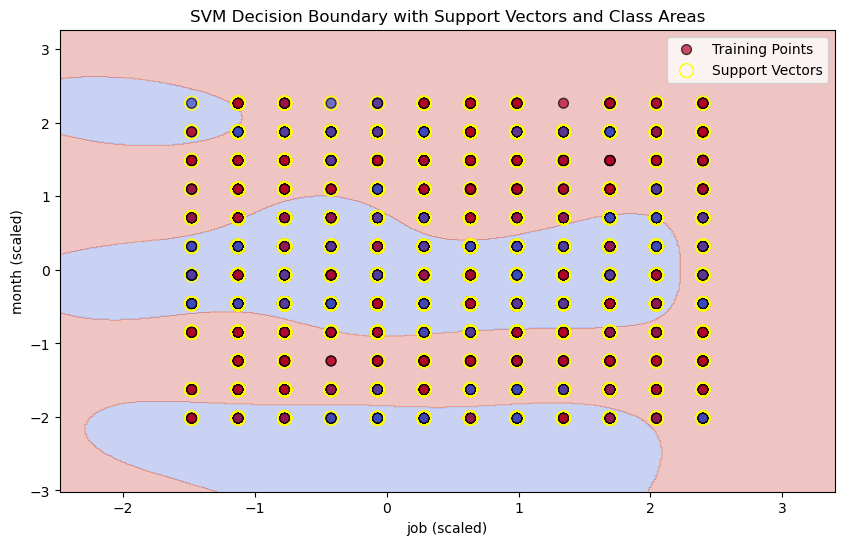

In [452]:
# Create a grid to plot the decision boundary
xx, yy = np.meshgrid(
    np.linspace(X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1, 500),
    np.linspace(X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1, 500)
)
grid = np.c_[xx.ravel(), yy.ravel()]
Z = svm_classifier_2D.predict(grid)
Z = Z.reshape(xx.shape)

# Plotting
plt.figure(figsize=(10, 6))

# Plot decision regions
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')

# Scatter plot of training points
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap='coolwarm', s=50, edgecolor='k', alpha=0.7, label='Training Points')

# Highlight support vectors
plt.scatter(svm_classifier_2D.support_vectors_[:, 0], svm_classifier_2D.support_vectors_[:, 1], facecolors='none', edgecolors='yellow', s=100, label='Support Vectors')

plt.title('SVM Decision Boundary with Support Vectors and Class Areas')
plt.xlabel('job (scaled)')
plt.ylabel('month (scaled)')
plt.legend()
plt.show()

Using all features provides the model with the most information, helping it to learn more detailed and complex patterns in the data. This enables the model to balance precision and recall for both classes, as it considers a wider range of factors to make predictions. The trade-off is that the decision boundary becomes more complex, but in this case, the added features improved the model's overall performance.

When using only the two most correlated features, the decision boundary becomes simpler, as the model focuses on the strongest predictors of the target variable. However, this simplicity comes at the cost of missing more subtle patterns provided by other features. As a result, the two most correlated features may not fully capture the relationship between the data and the target variable, leading to slightly worse performance compared to using all features.

Using the two least correlated features results in poor performance because these features have very little connection to the target variable. Without meaningful information, the model struggles to separate the classes, leading to higher misclassification rates. This highlights the importance of selecting features that are most relevant to the target variable.

# 3. Decision Tree Task (30 points)

* Define your decision tree model using sklearn. Also you should define other necessary modules for visualize the decision tree

### Download the dataset from https://drive.google.com/file/d/1D3peA-TzIqJqZDDKTlK0GQ7Ya6FIemFv/view?usp=sharing 

### import other necessary libraries

In [459]:
df=pd.read_csv("weights_bmi_6classes_updated.csv", encoding="utf-8")
df.head()

,BMI_CLASS,UNIT_NUM,STUB_NAME_NUM,STUB_LABEL_NUM,YEAR_NUM,AGE_NUM,ESTIMATE,SE,FLAG
0,1,1,1,1.1,1,1.0,41.6,0.8,0
1,1,1,1,1.1,2,1.0,33.0,0.8,0
2,1,1,1,1.1,3,1.0,32.3,0.7,0
3,1,1,1,1.1,4,1.0,31.6,0.8,0
4,1,1,1,1.1,5,1.0,30.8,0.7,0


* Define features and target variable, you will use all features of dataset in this task

In [463]:
X = df.drop(columns=['BMI_CLASS'])  
y = df['BMI_CLASS'] 



* Split the dataset into a training set and a validation set (80% training and 20% validation).

In [466]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
{
    "Training Features Shape": X_train.shape,
    "Validation Features Shape": X_val.shape,
    "Training Target Shape": y_train.shape,
    "Validation Target Shape": y_val.shape
}

{'Training Features Shape': (2688, 8),
 'Validation Features Shape': (672, 8),
 'Training Target Shape': (2688,),
 'Validation Target Shape': (672,)}

In [468]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
param_grid = {
    "max_depth": range(3, 21),
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "criterion": ["gini"]
}


# Initialize a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Perform a grid search with cross-validation
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring="accuracy",verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_

# Extract the results from the grid search
cv_results = pd.DataFrame(grid_search.cv_results_)

# Select relevant columns
results = cv_results[["param_max_depth", "param_min_samples_split", "param_min_samples_leaf", 
                       "param_criterion", "mean_test_score", "std_test_score"]]

# Group by min_samples_split, min_samples_leaf, and criterion
grouped_results = (
    results.sort_values(by=["param_max_depth", "mean_test_score"], ascending=[True, False])
    .groupby(["param_min_samples_split", "param_min_samples_leaf", "param_criterion"])
)

# Display grouped data
for group, data in grouped_results:
    print(f"Group: min_samples_split={group[0]}, min_samples_leaf={group[1]}, criterion={group[2]}")
    print(data[["param_max_depth", "mean_test_score", "std_test_score"]].to_string(index=False))
    print("-" * 80)


# Optionally reset Pandas display options after printing
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')
pd.reset_option('display.width')

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Group: min_samples_split=2, min_samples_leaf=1, criterion=gini
 param_max_depth  mean_test_score  std_test_score
               3         0.618306        0.013549
               4         0.645838        0.013304
               5         0.651417        0.011439
               6         0.645465        0.013189
               7         0.657001        0.015510
               8         0.665181        0.009605
               9         0.677087        0.013089
              10         0.678192        0.018091
              11         0.687132        0.013903
              12         0.686751        0.013859
              13         0.689730        0.006063
              14         0.690481        0.008005
              15         0.693827        0.010212
              16         0.691966        0.004191
              17         0.696801        0.006086
              18         0.697168        0.006380
              19        

/opt/anaconda3/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


* Initialize the Decision Tree classifier

In [471]:
clf_best = DecisionTreeClassifier(
    criterion='gini',
    max_depth=8,
    min_samples_split=5,
    min_samples_leaf=4
)

I want to select a model that achieves a balance between simplicity and performance while avoiding overfitting. To do this, I’m focusing on a model with moderate complexity that delivers solid accuracy without pursuing the absolute highest score, as that can often lead to overfitting. After analyzing the results, I observed that the accuracy plateaus around a max_depth of 8, making it a suitable choice. Additionally, I ensured the other parameters remained within a reasonable range to maintain a well-rounded model. Based on these considerations, I selected this configuration.

* Train the Decision Tree classifier

In [475]:
from sklearn.model_selection import cross_val_score
clf_best.fit(X_train, y_train)

train_accuracies = cross_val_score(
    clf_best, X_train, y_train, cv=5, scoring="accuracy"
)

print('Mean training accuracy of chosen model:' , train_accuracies.mean())

Mean training accuracy of chosen model: 0.6599779859192955


* Make predictions on the validation set

In [478]:
y_pred = clf_best.predict(X_val)

#### Evaluate the model's performance, print classification report and confusion matrix  (10 points)

In [481]:


# Evaluate the model's performance
print("\nClassification Report:")
print(classification_report(y_val, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_val, y_pred))


Classification Report:
              precision    recall  f1-score   support

           1       0.51      0.50      0.51       135
           2       0.87      0.84      0.85       111
           3       0.77      0.62      0.69       110
           4       0.55      0.77      0.64       103
           5       0.56      0.66      0.60       108
           6       0.70      0.50      0.58       105

    accuracy                           0.64       672
   macro avg       0.66      0.65      0.65       672
weighted avg       0.66      0.64      0.64       672


Confusion Matrix:
[[68  6 18 38  5  0]
 [ 8 93  1  5  4  0]
 [23  3 68 11  3  2]
 [18  1  1 79  4  0]
 [10  2  0  5 71 20]
 [ 6  2  0  5 40 52]]


#### Visualize the Decision Tree, show clearly class number, gini value etc.  (10 points)


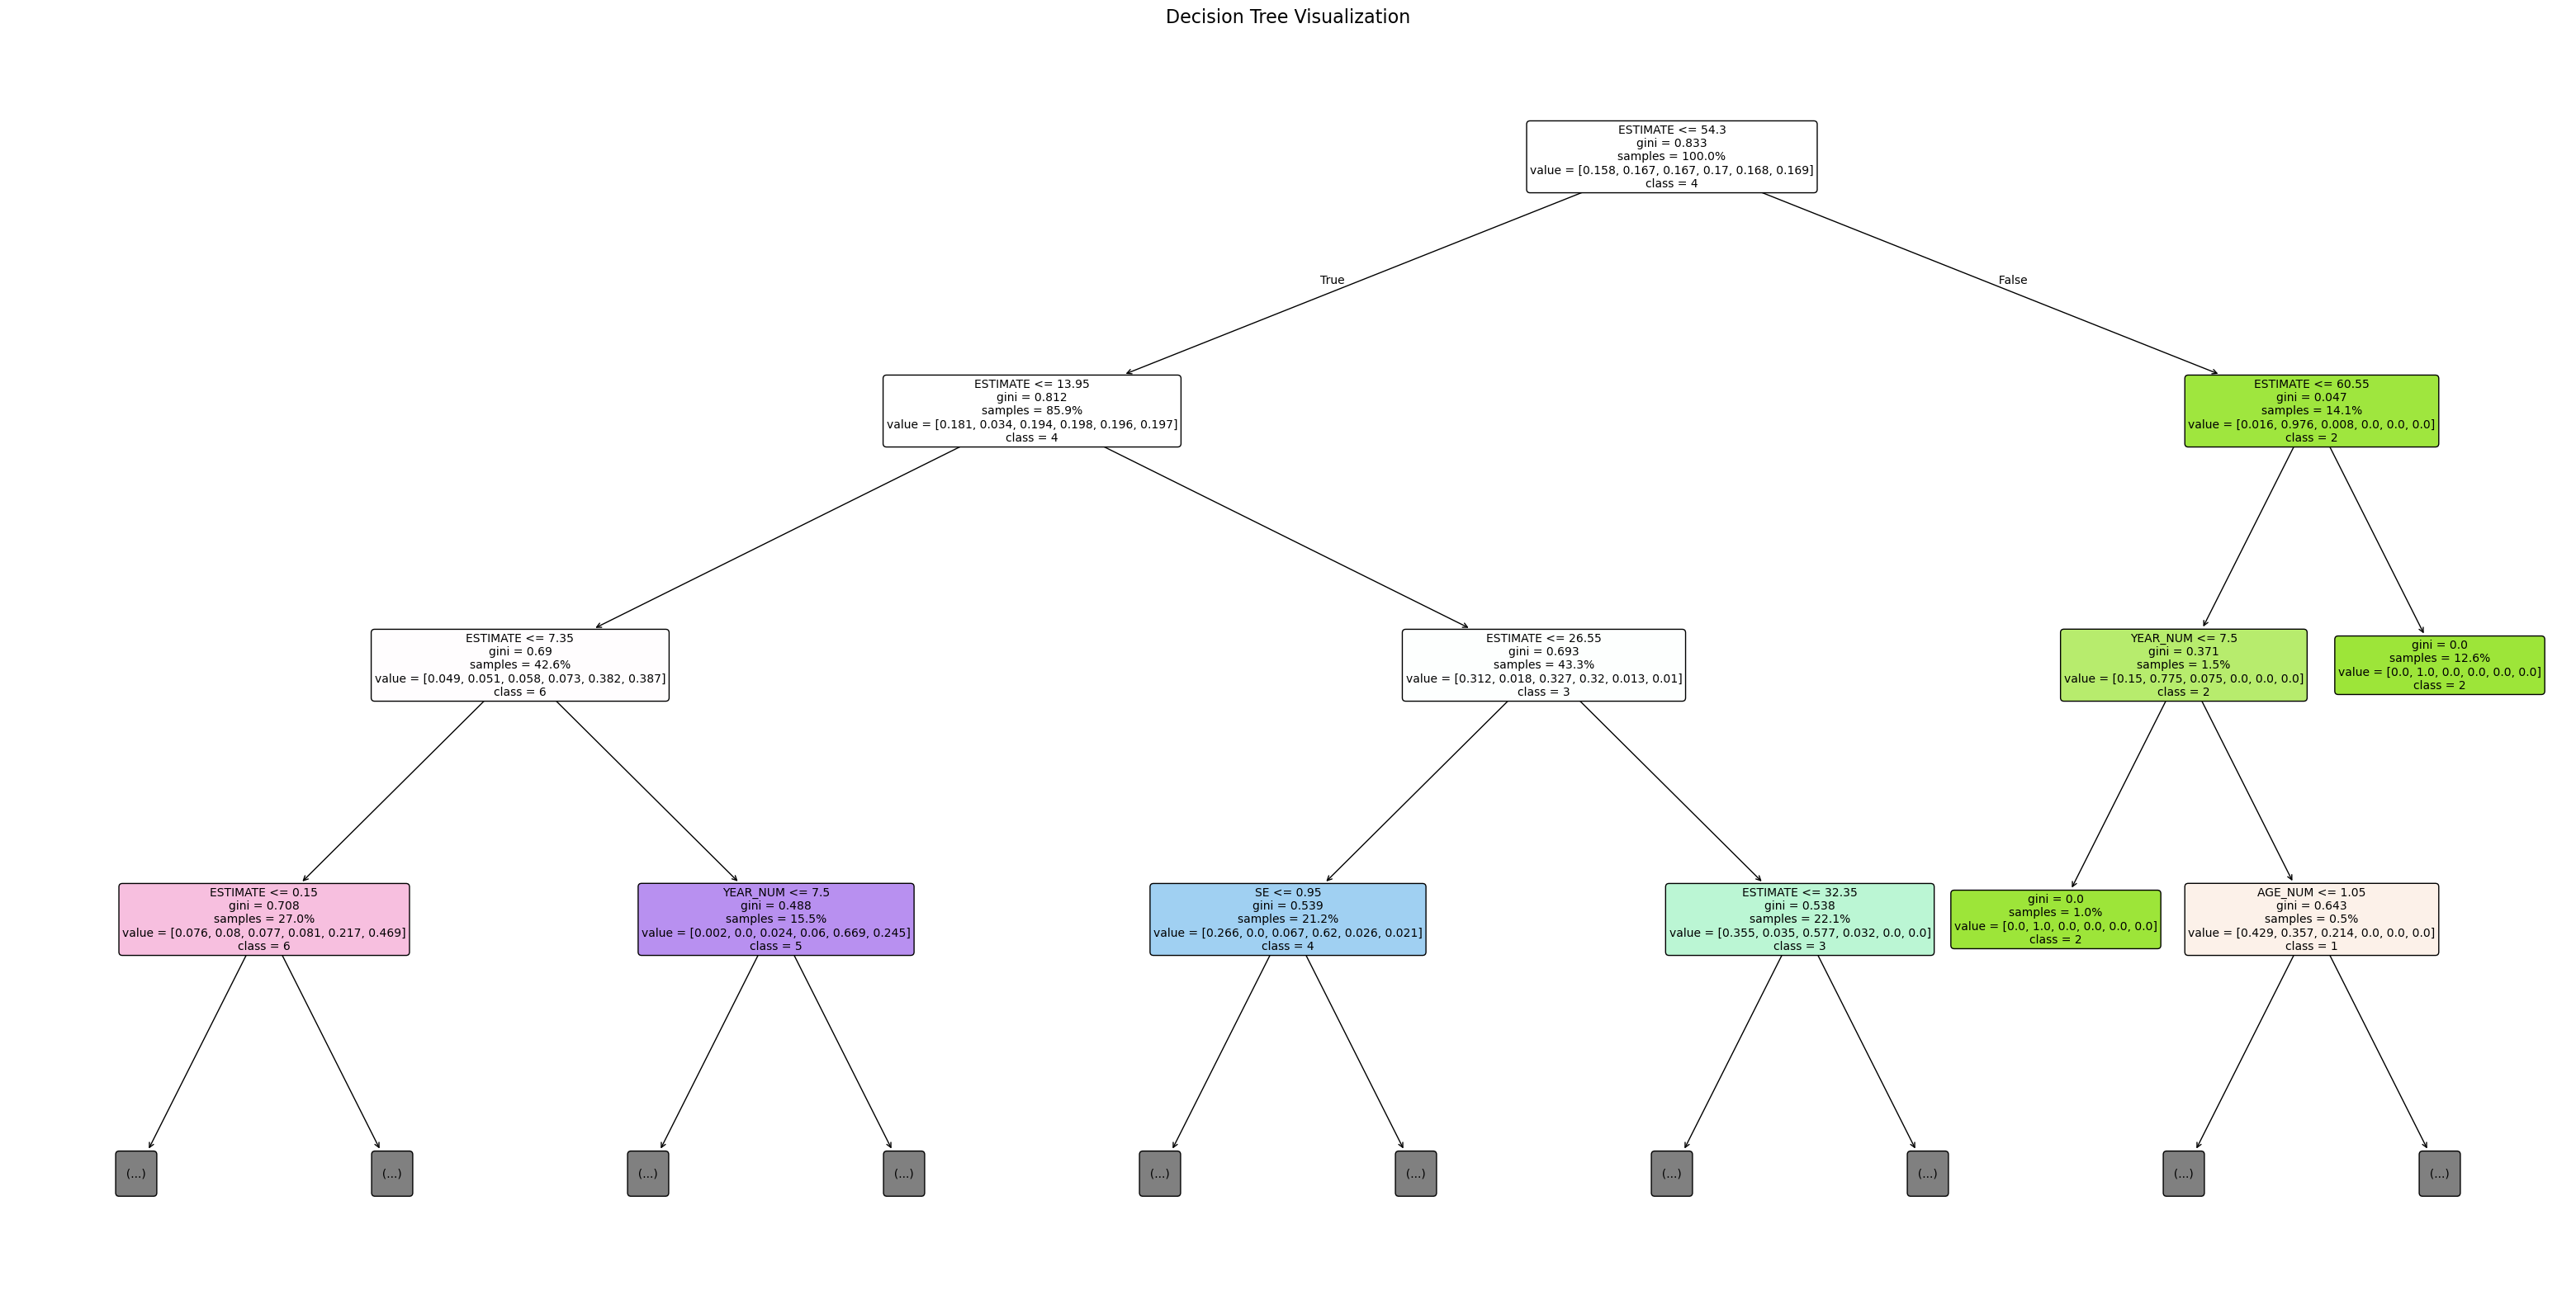

In [484]:
plt.figure(figsize=(40, 20))  # Adjust the figure size
plot_tree(
    clf_best,
    filled=True,
    feature_names=X_train.columns,
    class_names=[str(cls) for cls in clf_best.classes_],
    rounded=True,
    fontsize=10,  # Slightly larger font size for readability
    proportion=True,  # Scale node size by proportion
    max_depth=3  # Limit visualization to first 3 levels
)
plt.title("Decision Tree Visualization", fontsize=16)  # Larger title
plt.savefig("decision_tree.svg", format="svg", dpi=300)  # Save for zooming
plt.show()


### Explain briefly the question. What is the role of gini in decision tree? (10 points)

Gini Impurity is a measure used to check how well a split in a decision tree separates the data into the correct classes. It shows the chance that a randomly picked sample would be labeled incorrectly based on the class distribution in a node.

At every step, the decision tree uses Gini to find the best feature and value to split the data. The goal is to make the child nodes as "pure" as possible, meaning most samples in each node belong to the same class.

* If Gini = 0, the node is pure (all samples are in one class).
* A higher Gini value means the node is less pure (samples are mixed from different classes).